In [2]:
import pandas as pd

df = pd.read_csv(r'C:\Users\clint\Desktop\Geocoding_Task\Web_Scraping\2.csv')
df

,state_id,state,name,href,full_url,stop_type
0,1,Alabama,205 TRUCK CENTER,location_details.php?id=171,https://www.truckstopsandservices.com/location...,Trucker
1,1,Alabama,231 FUEL STOP,location_details.php?id=53886,https://www.truckstopsandservices.com/location...,Trucker
2,1,Alabama,4 WAY QUICK STOP,location_details.php?id=53890,https://www.truckstopsandservices.com/location...,Trucker
3,1,Alabama,A. W. HERNDON OIL CO. INC.,location_details.php?id=54388,https://www.truckstopsandservices.com/location...,Trucker
4,1,Alabama,ALLEN'S FOOD MART #9,location_details.php?id=10176,https://www.truckstopsandservices.com/location...,Trucker
...,...,...,...,...,...,...
15521,63,Alaska,MENTASTA LODGE,location_details.php?id=54692,http://www.rvandtravelers.com/location_details...,RVer
15522,63,Alaska,NORTHERN ENERGY CORP.,location_details.php?id=22842,http://www.rvandtravelers.com/location_details...,RVer
15523,63,Alaska,TESORO NORTH #78,location_details.php?id=22840,http://www.rvandtravelers.com/location_details...,RVer
15524,63,Alaska,TESORO TRUCK STOP #101,location_details.php?id=22818,http://www.rvandtravelers.com/location_details...,RVer


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd  # Assuming pandas is also imported for DataFrame operations

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("=" * 50)
print("COMPREHENSIVE ANALYSIS: STATE AND STOP_TYPE COLUMNS")
print("=" * 50)

# Basic DataFrame information
print(f"\n📊 Dataset Overview:")
print(f"Total records: {len(df):,}")
print(f"Total columns: {df.shape[1]}")
print(f"Date range: Data appears to be current")

# 1. STATE COLUMN ANALYSIS
print("\n" + "="*30)
print("🗺️  STATE ANALYSIS")
print("="*30)

# Basic state statistics
print(f"\n📍 State Distribution:")
state_counts = df['state'].value_counts()
print(f"Number of unique states: {df['state'].nunique()}")
print(f"\nTop 10 states by number of stops:")
print(state_counts.head(10))

print(f"\nBottom 5 states by number of stops:")
print(state_counts.tail(5))

# State statistics
print(f"\n📈 State Statistics:")
print(f"Mean stops per state: {state_counts.mean():.1f}")
print(f"Median stops per state: {state_counts.median():.1f}")
print(f"Standard deviation: {state_counts.std():.1f}")
print(f"Most stops in a state: {state_counts.max():,} ({state_counts.index[0]})")
print(f"Fewest stops in a state: {state_counts.min():,} ({state_counts.index[-1]})")

# 2. STOP_TYPE COLUMN ANALYSIS
print("\n" + "="*30)
print("🚛  STOP_TYPE ANALYSIS")
print("="*30)

# Basic stop_type statistics
print(f"\n📍 Stop Type Distribution:")
stop_type_counts = df['stop_type'].value_counts()
print(f"Number of unique stop types: {df['stop_type'].nunique()}")
print("\nStop type breakdown:")
for stop_type, count in stop_type_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{stop_type}: {count:,} ({percentage:.1f}%)")

# 3. CROSS-ANALYSIS: STATE vs STOP_TYPE
print("\n" + "="*30)
print("🔄  CROSS-ANALYSIS: STATE vs STOP_TYPE")
print("="*30)

# Create crosstab
crosstab = pd.crosstab(df['state'], df['stop_type'], margins=True)
print(f"\n📉 State vs Stop Type Cross-tabulation (showing top 10 states):")
print(crosstab.head(10))

# Calculate percentages by state
percentage_by_state = pd.crosstab(df['state'], df['stop_type'], normalize='index') * 100
print(f"\n📊 Percentage breakdown by state (top 10):")
print(percentage_by_state.head(10).round(1))

# Find states with highest percentage of each stop type
print(f"\n🏆 States with highest percentage of each stop type:")
for stop_type in df['stop_type'].unique():
    top_state = percentage_by_state[stop_type].idxmax()
    top_percentage = percentage_by_state[stop_type].max()
    print(f"{stop_type}: {top_state} ({top_percentage:.1f}%)")

COMPREHENSIVE ANALYSIS: STATE AND STOP_TYPE COLUMNS

📊 Dataset Overview:
Total records: 15,526
Total columns: 6
Date range: Data appears to be current

🗺️  STATE ANALYSIS

📍 State Distribution:
Number of unique states: 66

Top 10 states by number of stops:
state
Texas           1712
Georgia          593
Michigan         540
Ohio             525
Louisiana        492
Pennsylvania     490
California       455
Indiana          435
Missouri         431
Oklahoma         411
Name: count, dtype: int64

Bottom 5 states by number of stops:
state
Manitoba                     30
Newfoundland and Labrador    18
Nova Scotia                  16
Yukon                        15
Rhode Island                  8
Name: count, dtype: int64

📈 State Statistics:
Mean stops per state: 230.4
Median stops per state: 170.0
Standard deviation: 242.4
Most stops in a state: 1,712 (Texas)
Fewest stops in a state: 8 (Rhode Island)

🚛  STOP_TYPE ANALYSIS

📍 Stop Type Distribution:
Number of unique stop types: 2

Stop t


📈  CREATING VISUALIZATIONS


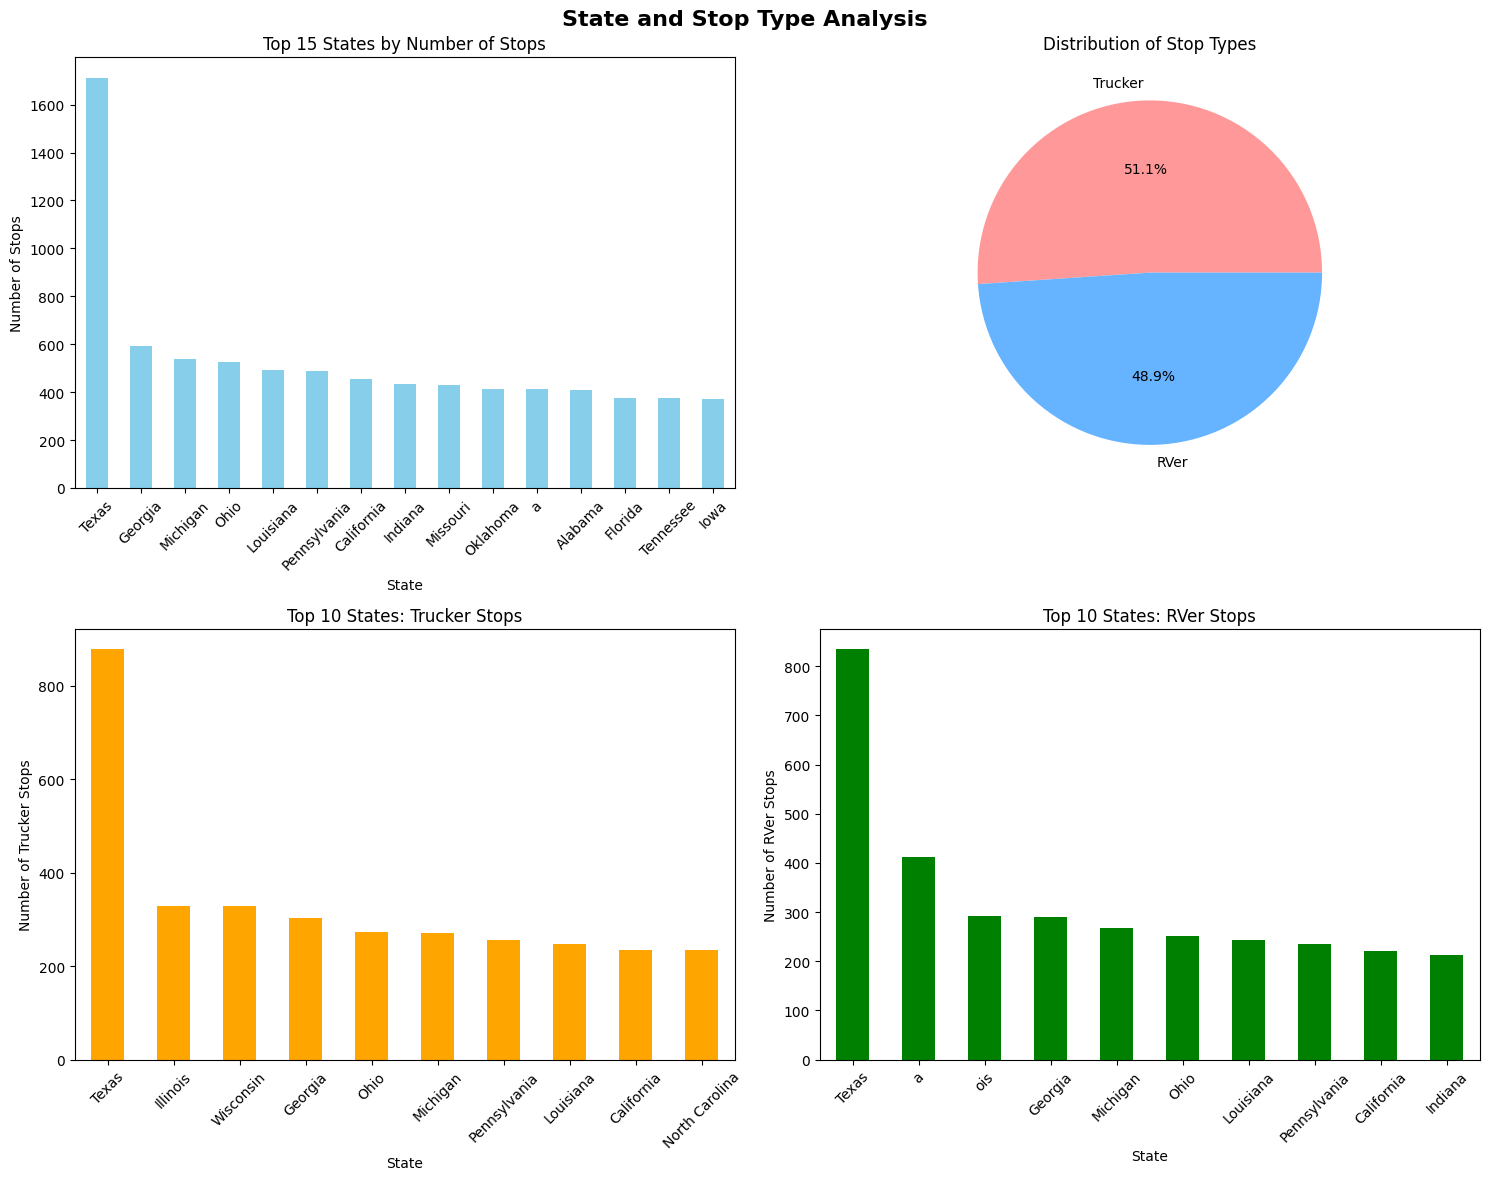


🎆 Visualizations created successfully!


In [4]:
# 4. VISUALIZATIONS
print("\n" + "="*30)
print("📈  CREATING VISUALIZATIONS")
print("="*30)

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('State and Stop Type Analysis', fontsize=16, fontweight='bold')

# 1. Top 15 States by Number of Stops
ax1 = axes[0, 0]
state_counts.head(15).plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Top 15 States by Number of Stops')
ax1.set_xlabel('State')
ax1.set_ylabel('Number of Stops')
ax1.tick_params(axis='x', rotation=45)

# 2. Stop Type Distribution (Pie Chart)
ax2 = axes[0, 1]
colors = ['#ff9999', '#66b3ff']
stop_type_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%', colors=colors)
ax2.set_title('Distribution of Stop Types')
ax2.set_ylabel('')

# 3. States with Most Trucker Stops
ax3 = axes[1, 0]
trucker_by_state = crosstab['Trucker'].drop('All').sort_values(ascending=False).head(10)
trucker_by_state.plot(kind='bar', ax=ax3, color='orange')
ax3.set_title('Top 10 States: Trucker Stops')
ax3.set_xlabel('State')
ax3.set_ylabel('Number of Trucker Stops')
ax3.tick_params(axis='x', rotation=45)

# 4. States with Most RVer Stops
ax4 = axes[1, 1]
rver_by_state = crosstab['RVer'].drop('All').sort_values(ascending=False).head(10)
rver_by_state.plot(kind='bar', ax=ax4, color='green')
ax4.set_title('Top 10 States: RVer Stops')
ax4.set_xlabel('State')
ax4.set_ylabel('Number of RVer Stops')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n🎆 Visualizations created successfully!")

In [6]:
percentage_by_state

stop_type,RVer,Trucker
state,,
Alabama,49.019608,50.980392
Alaska,51.162791,48.837209
Alberta,50.000000,50.000000
Arizona,46.354167,53.645833
Arkansas,49.044586,50.955414
...,...,...
g,100.000000,0.000000
gton,100.000000,0.000000
ia,100.000000,0.000000


In [7]:
# 5. SPECIFIC ANALYSIS: STATES WITH MOST & LEAST TRUCK STOPS
print("\n" + "="*50)
print("🚚 TRUCK STOP ANALYSIS BY STATE")
print("="*50)

# Get only trucker-related stops
trucker_stops_df = df[df['stop_type'] == 'Trucker']
print(f"\nTotal number of trucker stops: {len(trucker_stops_df):,}")

# States with most truck stops
state_trucker_counts = trucker_stops_df['state'].value_counts()
print("\n" + "="*30)
print("🏆 TOP 15 STATES WITH MOST TRUCK STOPS")
print("="*30)
top_trucker_states = state_trucker_counts.head(15)

for idx, (state, count) in enumerate(top_trucker_states.items(), 1):
    print(f"{idx}. {state}: {count:,} truck stops")
    
# Calculate percentage from total truck stops
print("\nPercentage of all truck stops:")
for state, count in top_trucker_states.items():
    percentage = (count / len(trucker_stops_df)) * 100
    print(f"{state}: {percentage:.1f}%")

# States with least truck stops
print("\n" + "="*30)
print("🔍 BOTTOM 15 STATES WITH LEAST TRUCK STOPS")
print("="*30)
bottom_trucker_states = state_trucker_counts.tail(15)

# Reverse to display in ascending order
for idx, (state, count) in enumerate(bottom_trucker_states.iloc[::-1].items(), 1):
    print(f"{idx}. {state}: {count:,} truck stops")

# Calculate statistics for truck stops
print("\n" + "="*30)
print("📊 TRUCK STOP STATISTICS")
print("="*30)
print(f"Mean truck stops per state: {state_trucker_counts.mean():.1f}")
print(f"Median truck stops per state: {state_trucker_counts.median():.1f}")
print(f"Standard deviation: {state_trucker_counts.std():.1f}")
print(f"Most truck stops: {state_trucker_counts.max():,} ({state_trucker_counts.index[0]})")
print(f"Fewest truck stops: {state_trucker_counts.min():,} ({state_trucker_counts.index[-1]})")

# Calculate concentration metrics
total_truck_stops = len(trucker_stops_df)
top_5_percentage = (state_trucker_counts.head(5).sum() / total_truck_stops) * 100
top_10_percentage = (state_trucker_counts.head(10).sum() / total_truck_stops) * 100

print(f"\nMarket concentration:")
print(f"Top 5 states have {top_5_percentage:.1f}% of all truck stops")
print(f"Top 10 states have {top_10_percentage:.1f}% of all truck stops")


🚚 TRUCK STOP ANALYSIS BY STATE

Total number of trucker stops: 7,928

🏆 TOP 15 STATES WITH MOST TRUCK STOPS
1. Texas: 878 truck stops
2. Wisconsin: 328 truck stops
3. Illinois: 328 truck stops
4. Georgia: 304 truck stops
5. Ohio: 273 truck stops
6. Michigan: 272 truck stops
7. Pennsylvania: 255 truck stops
8. Louisiana: 248 truck stops
9. North Carolina: 235 truck stops
10. California: 235 truck stops
11. Indiana: 223 truck stops
12. Missouri: 221 truck stops
13. Alabama: 208 truck stops
14. Oklahoma: 207 truck stops
15. South Carolina: 202 truck stops

Percentage of all truck stops:
Texas: 11.1%
Wisconsin: 4.1%
Illinois: 4.1%
Georgia: 3.8%
Ohio: 3.4%
Michigan: 3.4%
Pennsylvania: 3.2%
Louisiana: 3.1%
North Carolina: 3.0%
California: 3.0%
Indiana: 2.8%
Missouri: 2.8%
Alabama: 2.6%
Oklahoma: 2.6%
South Carolina: 2.5%

🔍 BOTTOM 15 STATES WITH LEAST TRUCK STOPS
1. Rhode Island: 4 truck stops
2. Yukon: 7 truck stops
3. Nova Scotia: 8 truck stops
4. Newfoundland and Labrador: 9 truck stops



📈 VISUALIZING TRUCK STOP DISTRIBUTION


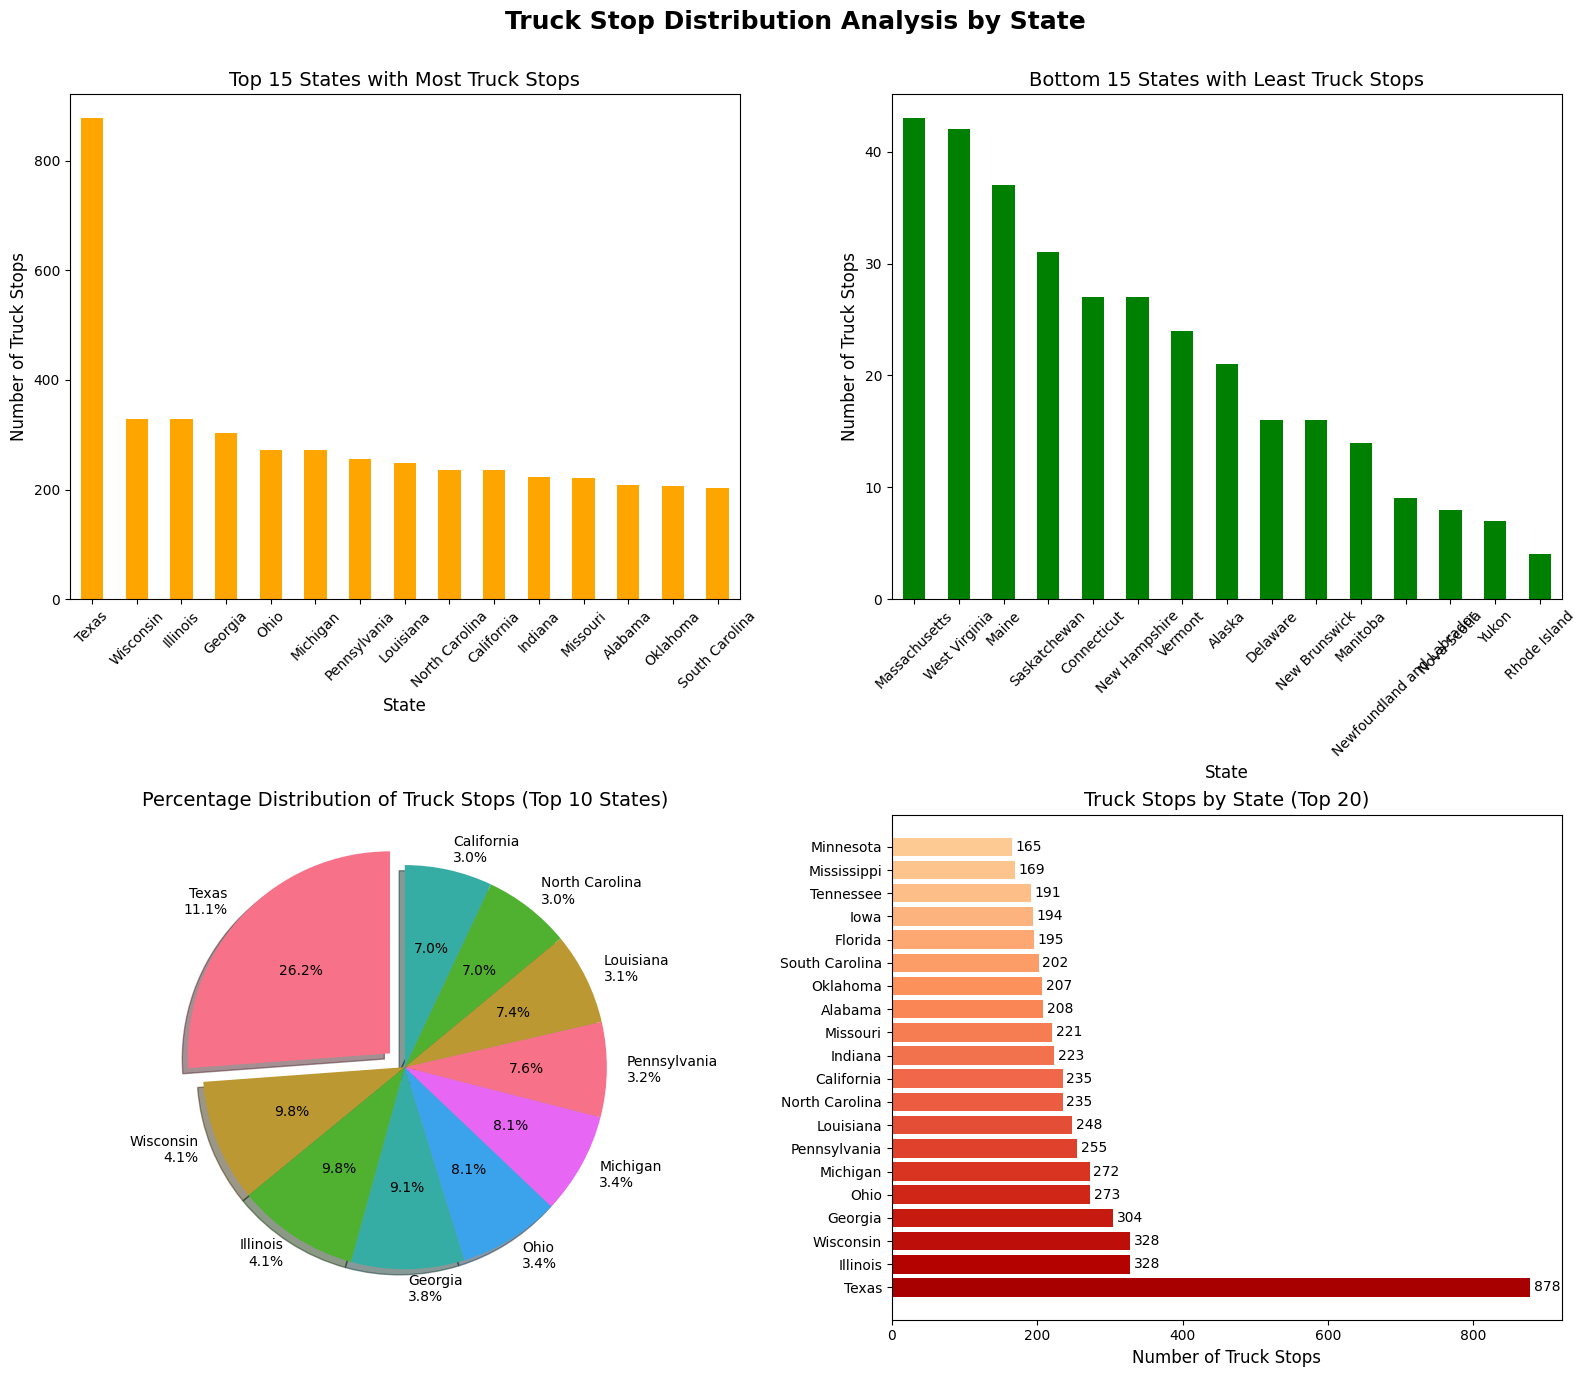


🌐 Truck stop distribution visualizations complete!


In [9]:
# 6. VISUALIZING TRUCK STOP DISTRIBUTION
print("\n" + "="*50)
print("📈 VISUALIZING TRUCK STOP DISTRIBUTION")
print("="*50)

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
fig.suptitle('Truck Stop Distribution Analysis by State', fontsize=18, fontweight='bold')

# 1. Top 15 States with Most Truck Stops
ax1 = axes[0, 0]
top_trucker_states.plot(kind='bar', ax=ax1, color='orange')
ax1.set_title('Top 15 States with Most Truck Stops', fontsize=14)
ax1.set_xlabel('State', fontsize=12)
ax1.set_ylabel('Number of Truck Stops', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# 2. Bottom 15 States with Least Truck Stops
ax2 = axes[0, 1]
bottom_trucker_states.plot(kind='bar', ax=ax2, color='green')
ax2.set_title('Bottom 15 States with Least Truck Stops', fontsize=14)
ax2.set_xlabel('State', fontsize=12)
ax2.set_ylabel('Number of Truck Stops', fontsize=12)
ax2.tick_params(axis='x', rotation=45)

# 3. Percentage Distribution of Truck Stops (Top 10 States)
ax3 = axes[1, 0]
top_10_percentages = [(count / total_truck_stops) * 100 for count in state_trucker_counts.head(10)]
top_10_labels = [f"{state}\n{pct:.1f}%" for state, pct in zip(state_trucker_counts.head(10).index, top_10_percentages)]
ax3.pie(top_10_percentages, labels=top_10_labels, autopct='%1.1f%%', 
       startangle=90, shadow=True, explode=[0.1] + [0] * 9)
ax3.set_title('Percentage Distribution of Truck Stops (Top 10 States)', fontsize=14)

# 4. Truck Stop Density (Stops per state, top 20)
ax4 = axes[1, 1]
top_20_states = state_trucker_counts.head(20).index
state_data = pd.DataFrame({'State': top_20_states, 'Stops': state_trucker_counts.head(20).values})

# Create a horizontal bar chart
colors = plt.cm.OrRd(np.linspace(0.3, 0.9, len(state_data)))
state_data = state_data.sort_values('Stops')
ax4.barh(state_data['State'], state_data['Stops'], color=colors)

# Add data labels to the bars
for i, (stops, state) in enumerate(zip(state_data['Stops'], state_data['State'])):
    ax4.text(stops + 5, i, f"{stops:,}", va='center')

ax4.set_title('Truck Stops by State (Top 20)', fontsize=14)
ax4.set_xlabel('Number of Truck Stops', fontsize=12)
ax4.invert_yaxis()  # To have the highest value at the top

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

print("\n🌐 Truck stop distribution visualizations complete!")


In [11]:
# 7. DETAILED TRUCK STOP INSIGHTS AND REGIONAL PATTERNS
print("\n" + "="*50)
print("🧰 DETAILED TRUCK STOP INSIGHTS AND PATTERNS")
print("="*50)

# Group states by region for regional analysis
def assign_region(state):
    northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 
                'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont']
    midwest = ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 
              'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin']
    south = ['Alabama', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 
            'Louisiana', 'Maryland', 'Mississippi', 'North Carolina', 'Oklahoma', 
            'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'West Virginia']
    west = ['Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 
           'Montana', 'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming']
    canada = ['Alberta', 'British Columbia', 'Manitoba', 'New Brunswick', 
             'Newfoundland and Labrador', 'Nova Scotia', 'Ontario', 
             'Prince Edward Island', 'Quebec', 'Saskatchewan', 'Yukon']
    
    if state in northeast:
        return 'Northeast'
    elif state in midwest:
        return 'Midwest'
    elif state in south:
        return 'South'
    elif state in west:
        return 'West'
    elif state in canada:
        return 'Canada'
    else:
        return 'Other'

# Create a copy of the trucker stops dataframe with region information
trucker_regional_df = trucker_stops_df.copy()
trucker_regional_df['region'] = trucker_regional_df['state'].apply(assign_region)

# Regional analysis
print("\n" + "="*30)
print("🌍 REGIONAL TRUCK STOP ANALYSIS")
print("="*30)

# Count truck stops by region
region_counts = trucker_regional_df['region'].value_counts()
print(f"\nTruck stop counts by region:")
for region, count in region_counts.items():
    percentage = (count / len(trucker_regional_df)) * 100
    print(f"{region}: {count:,} stops ({percentage:.1f}%)")

# Calculate truck stops per state for each region
region_state_counts = {}
for region in region_counts.index:
    states_in_region = trucker_regional_df[trucker_regional_df['region'] == region]['state'].nunique()
    if states_in_region > 0:
        avg_per_state = region_counts[region] / states_in_region
        region_state_counts[region] = avg_per_state

print(f"\nAverage truck stops per state by region:")
for region, avg in region_state_counts.items():
    print(f"{region}: {avg:.1f} truck stops per state")

# Identify major trucking corridors
print("\n" + "="*30)
print("🚛 MAJOR TRUCKING CORRIDORS ANALYSIS")
print("="*30)

# Interstate corridor insights
print(f"\nMajor truck stop corridors (based on state data):")
# Filter for states that are in the index before creating the I-10 corridor list
i10_states = [state for state in ['California', 'Arizona', 'New Mexico', 'Texas', 'Louisiana'] 
              if state in state_trucker_counts.index]
print(f"1. I-10 Corridor: {', '.join(i10_states)}")

# Filter for states that are in the index before creating the I-95 corridor list
i95_states = [state for state in ['Maine', 'New Hampshire', 'Massachusetts', 'Rhode Island', 'Connecticut', 
                                  'New York', 'New Jersey', 'Pennsylvania', 'Delaware', 'Maryland', 
                                  'Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida'] 
              if state in state_trucker_counts.index]
print(f"2. I-95 Eastern Seaboard: {', '.join(i95_states)}")

print(f"3. I-80 East-West: Significant truck traffic across Northern states")

# Check if these states are in the index before trying to access them
midwest_states = [state for state in ['Illinois', 'Indiana', 'Ohio'] if state in state_trucker_counts.index]
if midwest_states:
    print(f"4. Midwest distribution network centered in {state_trucker_counts.loc[midwest_states].idxmax()}")
else:
    print(f"4. Midwest distribution network information not available")

# Density insights
print("\n" + "="*30)
print("📈 TRUCK STOP DENSITY INSIGHTS")
print("="*30)

# States by density type
high_density = state_trucker_counts.head(5).index.tolist()
low_density = state_trucker_counts.tail(5).index.tolist()

print(f"\nHigh Density States: {', '.join(high_density)}")
print(f"These states account for {top_5_percentage:.1f}% of all truck stops")
print(f"\nLow Density States: {', '.join(low_density)}")

# Business insights
print("\n" + "="*30)
print("💼 TRUCK STOP BUSINESS INSIGHTS")
print("="*30)

print(f"\n💡 Key Business Insights:")
print(f"1. Market Concentration: Top 10 states have {top_10_percentage:.1f}% of all truck stops")
print(f"2. Primary Market: {state_trucker_counts.index[0]} dominates with {state_trucker_counts.iloc[0]} stops ({(state_trucker_counts.iloc[0]/total_truck_stops)*100:.1f}% of market)")
print(f"3. Underserved Markets: States with <50 truck stops may represent expansion opportunities")

print(f"\n🔸 Regions with Highest Potential for Growth:")
for state, count in bottom_trucker_states.iloc[-10:].items():
    if count < 50:
        print(f"- {state}: Currently only {count} truck stops")

print("\n" + "="*50)
print("✅ TRUCK STOP ANALYSIS COMPLETE")
print("="*50)


🧰 DETAILED TRUCK STOP INSIGHTS AND PATTERNS

🌍 REGIONAL TRUCK STOP ANALYSIS

Truck stop counts by region:
South: 3,411 stops (43.0%)
Midwest: 2,409 stops (30.4%)
West: 1,066 stops (13.4%)
Northeast: 688 stops (8.7%)
Canada: 354 stops (4.5%)

Average truck stops per state by region:
South: 213.2 truck stops per state
Midwest: 200.8 truck stops per state
West: 88.8 truck stops per state
Northeast: 76.4 truck stops per state
Canada: 35.4 truck stops per state

🚛 MAJOR TRUCKING CORRIDORS ANALYSIS

Major truck stop corridors (based on state data):
1. I-10 Corridor: California, Arizona, New Mexico, Texas, Louisiana
2. I-95 Eastern Seaboard: Maine, New Hampshire, Massachusetts, Rhode Island, Connecticut, New York, New Jersey, Pennsylvania, Delaware, Maryland, Virginia, North Carolina, South Carolina, Georgia, Florida
3. I-80 East-West: Significant truck traffic across Northern states
4. Midwest distribution network centered in Illinois

📈 TRUCK STOP DENSITY INSIGHTS

High Density States: Tex